## Equation: y = b + b1.x1 + b2.(x2) + b3.(x3) +....

In [1]:
#Imported the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Splitted the features and dependent Variables
dataset=pd.read_csv("50_Startups.csv")
X=dataset.iloc[:,:-1].values #.values because to get the datasets in the form of numpyArray
Y=dataset.iloc[:,-1].values


In [3]:
#Encoding the strings
#We could also assign the numerical values like 1,2,3.. for the strings but the ML Model in future would correlate as the strings have relation with each other, so we are encoding the strings such a way that there should not be a relationship among them
#Hot-Encoding
from sklearn.compose import ColumnTransformer # Used for tansforming into encodes
from sklearn.preprocessing import OneHotEncoder # Encoding type, That is HOtEncoding
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
#For transformer: 1-Arg= Which kind of transformation that is Encoding
                 # 2-Arg= Which Encoding that HotEncoding
                 # 3-Arg which indexs want we to encode: col-index number
#For remainder=passthourgh: If not applied, then hot encoding done from 0 to secondlast col by default

#Now lets connect the above object with the input-Matrix X:
#Unlike for missing value diferent steps for fitting and tranforming, here module has both in one
X=np.array(ct.fit_transform(X)) #ct.fit_trans donot returns the matrix into numpy array but X dataset should be numpyArray
print(X)#The resultant replacement by the dummyVaraibles

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [4]:
#So no missing values, Splitted the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


## (*) No featureScaling would be required in multipleLR as because in this everyColumn_feature has its own coefficient and that coefficient would compensate the contribution of the feature in the prediction

## (*) SkLearn_LR_model will avoid the dummyVar_trap as already avoiding implimentation is been impliemeted inside the class

## (*) Also the SKlearn_LR_model will impliment the most efficient model_building procedure and come with accurate and optimised the model with efficient P_valued and significale_valued feaures

In [5]:
#Model importing and training it
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # Making the modelInstance or object of the modelClass
regressor.fit(X_train,Y_train) # Training it from the training datasets

LinearRegression()

In [6]:
# Predicting the testing datasets
Y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2) # Explained Below:
# set_printoptions is a function within NumPy that allows to configure various options for how NumPy arrays are displayed.
# precision=2 sets the precision for floating-point numbers to 2 decimal places.
# This means that when you print or display a NumPy array with floating-point numbers, they will be displayed with two decimal places.

## (*) Hence here X_train vs Y_train, that is inclusion of input features on the x-axis is not possible as here we have multiple-n features and if so we would ended_up with n_dimensional graph, which is not feasible
## (*) So would proceed with pred vs test dependent var as they have only one dimension

In [7]:
# Concaneted both array into single 2d array for easy judging them
#OR Combining the 2_Verticale arrays together into single 2d array
combined_array = np.column_stack((Y_pred,Y_test)) #Directly we could concatenate the 2Arrays into 2D arrays with eachVerticle col contains the array
print(combined_array)
print()
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1)) #Can concatenate the Arrays into single arrays
# Here firstly the horizontalArrays are converted into verticale from reshape(rows,col) and at the end "1" represent to combined them side-side vertically into a single array, becomes 2d array

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


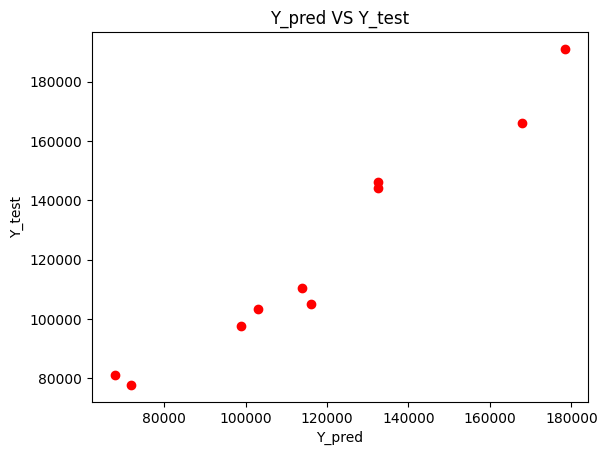

In [8]:
#Visualising the prediction with test results
plt.scatter(Y_pred,Y_test,c="r")
plt.title("Y_pred VS Y_test")
plt.xlabel("Y_pred")
plt.ylabel("Y_test")
plt.show()

## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [9]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


## Therefore, our model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

Important note 1: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

1,0,0,160000,130000,300000→scalars

[1,0,0,160000,130000,300000]→1D array

[[1,0,0,160000,130000,300000]]→2D array

Important note 2: Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

## Getting the final linear regression equation with the values of the coefficients

In [10]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


## Therefore, the equation of our multiple linear regression model is:

Profit=86.6×Dummy State 1−873×Dummy State 2+786×Dummy State 3+0.773×R&D Spend+0.0329×Administration+0.0366×Marketing Spend+42467.53

Important Note: To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.